<a href="https://colab.research.google.com/github/iagosde/analise_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Asheville).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-iagoduqueestrada-red.svg)](https://www.linkedin.com/in/iago-soares-duque-estrada-1b994b92/?originalSubdomain=br)
[![GitHub](https://img.shields.io/badge/GitHub-iagosde-purple.svg)](https://github.com/iagosde)

---

# Análise dos Dados do Airbnb - *Asheville - Carolina do Norte*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Asheville, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Conhecendo um pouco de Asheville

A cidade de Asheville é a sede (capital) do condado de Buncombe, na Carolina do Norte e conta com restaurantes premiados e cervejarias artesanais, lojas e butiques de proprietários locais e uma comunidade artesã de sucesso, composta por pintores, designers e criadores. Além disso, é uma ótima escolha para quem gosta de aproveitar a vida ao ar livre e por pessoas apaixonadas por natureza e cultura.


<center><img alt="Analisando Airbnb" width="80%" src="https://www.visiteosusa.com.br/sites/default/files/styles/hero_l/public/images/hero_media_image/2016-11/2ea07a8bf93ede571f3b8383a0ca8f70.png?h=278b0c80&itok=qMeHKde0"></center>

Além do cenário gastronômico, a cidade se destaca também por suas cervejas artesanais e afirma ter mais cervejarias per capita do que qualquer outra cidade dos Estados Unidos.

A cidade é conhecida por ser um paraíso dos artistas, que costumam instalar galerias e estúdios em antigas fábricas e construções históricas no distrito de River Arts). No segundo sábado de todos os meses, muitos estúdios permanecem abertos até tarde para o evento "A Closer Look", que oferece apresentações de música ao vivo e teatro, além de festas e instalações especiais.

Asheville possui também a maior casa privada dos Estados Unidos, chamada Biltmore House.


## Contexto Turístico

Por ter as características apresentadas acima, a cidade é destino de muitos turistas e tem o intuito de continuar sendo a escolha deles. Entretanto, com o crescimento acelerado dos empreendimentos hoteleiros/airbnb na região, a preocupação dos moradores também aumentou.

Diante dessas preocupações, foram recomendadas pela cidade, novas regras para restringir severamente os aluguéis de temporada de curta duração (menos de 30 dias) no centro da cidade. Com isso, somente quem já possuía licensa para locação poderia continuar.

**Essa situação é relevante para a análise em questão porque com o aumento de turismo e limitação de disponibilidade de locação no centro da cidade, a tendência é que o preço na mesma, aumente.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Asheville (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/nc/asheville/2022-09-14/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem o objetivo de nos situar inicialmente sobre como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - código postal do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses
* `license` - esta coluna não contém nenhum valor válido

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,120,30,90,2021-12-19,0.67,2,310,1,NaN
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,100,1,369,2022-08-30,2.72,7,84,35,NaN
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.50,7,0,0,NaN
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,30,1,315,2022-08-23,2.34,7,106,26,NaN
4,197263,Tranquil Room & Private Bath,961396,Timo,NaN,28806,35.57808,-82.63689,Private room,45,2,60,2022-08-21,0.49,2,70,22,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta etapa verificaremos quantas entradas (linhas) e variáveis (colunas) possui esse *dataset*. Além disso, vericaremos também, quais os tipos das variáveis.

Obs.: O *dataset* usado é uma versão "resumida" do Airbnb. Na mesma página que baixei o arquivo `listings.csv`, há uma versão mais completa.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

# verificar os tipos das entradas do dataset
display(df.dtypes)

Entradas:	 3009
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente ligado à sua quantidade de valores ausentes. Por isso, é importante verificarmos logo no início se os valores nulos são significativos comparados ao total de entradas.

* Conseguimos perceber que as variáveis `license` e `neighbourhood_group` têm 100% dos seus valores faltantes.

* Percebemos também que as variáveis `reviews_per_month`  e `last_review` possuem quase 10% dos seus valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.063809
last_review                       0.063809
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para entendermos a distribuição das variáveis, plotarei o histograma.

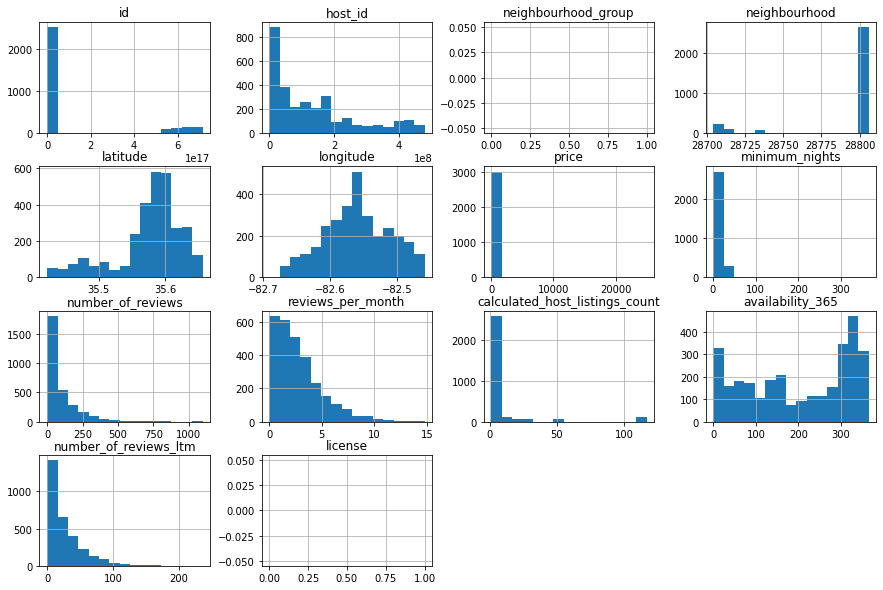

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma conseguimos perceber indícios de *outliers* nas variáveis `price`e `calculated_host_listing_count`.

Conseguimos perceber isso porque seus valores não seguem uma distribuição e distorcem a representação gráfica.

Para confirmar se realmente há *outliers*, existem duas maneiras que podem nos ajudar, são elas:

* Verificar o resumo estatístico através do método `describe()`.
* Plotar `boxplots` da variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()
                    

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3009.000000,3009.000000,3009.000000,2817.000000,3009.000000,3009.000000,3009.000000
mean,215.761050,5.254902,92.811233,2.777710,8.722832,199.924892,25.753074
std,918.367015,14.978303,121.140325,2.286077,23.338049,122.459846,28.020281
min,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,98.000000,1.000000,11.000000,1.030000,1.000000,83.000000,4.000000
50%,138.000000,2.000000,48.000000,2.220000,2.000000,218.000000,17.000000
75%,215.000000,2.000000,130.000000,3.840000,4.000000,317.000000,38.000000
max,25000.000000,365.000000,1098.000000,14.780000,117.000000,365.000000,236.000000


Analisando o resumo estatístico, podemos confirmar a hipótese abaixo:

* A variável `price` possui 75% dos seus valores abaixo de 215, porém seu valor máximo é 25000.

# **Limpando os Outliers**

Para tratar os *outliers* da variável `price`, vou calcular os limites usando a regra do IQR Score.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para a variável `price` que limparemos.
* Calcular o IQR para a variável.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

Após realizar o tratamento, plotarei seu `boxplot`.

In [ ]:
# Identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print("IQR da variável price:", IQR_price)

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print("Limite superior de price:", sup_price)
print("Limite inferior de price:", inf_price)

IQR da variável price: 117.0
Limite superior de price: 390.5
Limite inferior de price: -77.5


Podemos ver que não termos outliers na parte inferior.

Vamos plotar os `boxplots` para visualizarmos a diferença feita pela limpeza.

Para isso, seguiremos os seguintes passos:

* Plotar o `bloxplot` da variável `price` sem a limpeza.
* Fazer a limpeza da variável `price`.
* Plotar o `bloxplot` da variáel `price` após a limpeza.

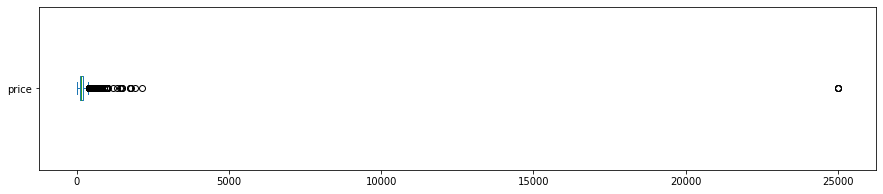

price: valores acima de 390.5:
206 Entradas
6.8461%


In [ ]:
# Verificando o conjunto original (sem a limpeza)
df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 390.5 para price
print('price: valores acima de 390.5:')
print('{} Entradas'.format(len(df[df.price > 390.5])))
print('{:.4f}%'.format((len(df[df.price > 390.5]) / df.shape[0])*100))

In [ ]:
# Limpando o Dataset
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 390.5].index, axis=0, inplace=True)
print("Shape antes da limpeza:", df.shape)
print("Shape depois da limpeza:", df_clean.shape)

Shape antes da limpeza: (3009, 18)
Shape depois da limpeza: (2803, 18)


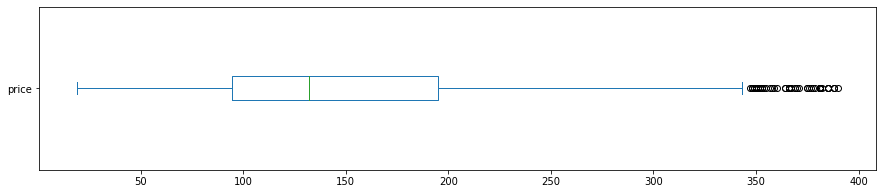

Tamanho original: 3009 entradas
Tamanho atual: 2803 entradas


In [ ]:
# Verificando o conjunto limpo
df_clean.price.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

print("Tamanho original: {} entradas".format(df.shape[0]))
print("Tamanho atual: {} entradas".format(df_clean.shape[0]))

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

#### Histogramas sem *outliers*

Já que tratamos os *outliers* na variável `price`, vamos plotar novamente os histogramas, mas com o *DataFrame* limpo.

Nessa fase, excluíremos também as variáveis `license` e `neighbourhood_group` que, conforme vimos anteriormente, possuem 100% dos seus dados ausentes.



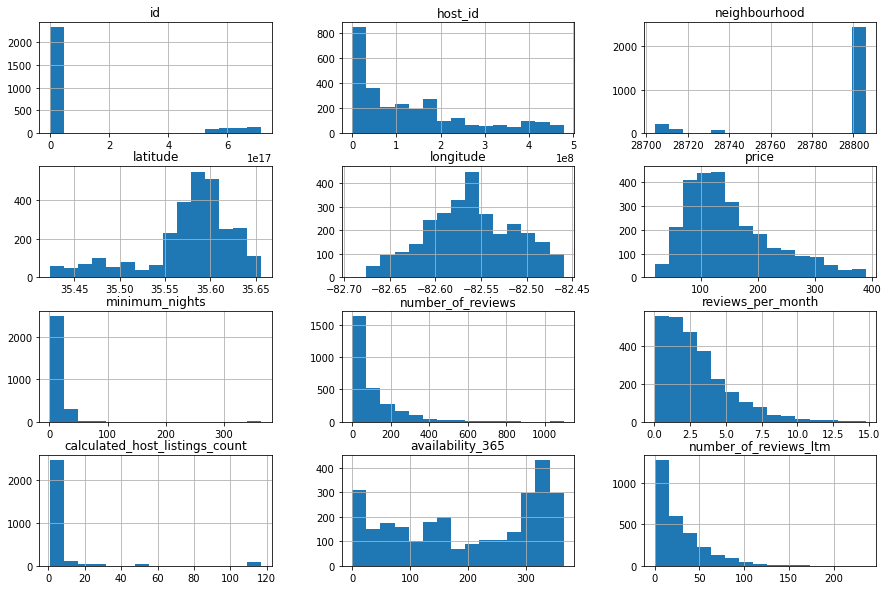

In [ ]:
# Removendo "license" e "neighbourhood_group" porque estão vazios
df_clean.drop(["license", "neighbourhood_group"], axis=1, inplace=True)

# Verificando as distribuições
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Podemos perceber que a média dos preços de aluguel é de **151**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

151.0770602925437

### **Q6. Qual a correlação existente entre as variáveis**

A correlação nada mais é do que a existência de uma relação entre duas coisas. Nesse caso, buscamos uma relação ou semelhança entre 2 variáveis.

Essa relação pode ser medida e, através do coeficiente de correlação, conseguimos saber a intensidade da mesma.

Para identificar as correlações seguirei os passos abaixo:

* Criar uma matriz de correlação
* A partir dessa matriz, gerar um *heatmap*, usando a biblioteca `seaborn`.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.112024,-0.164555,-0.150132,0.266863,0.154630,-0.112111
minimum_nights,-0.112024,1.000000,-0.131377,-0.200861,-0.072698,-0.025065,-0.204814
number_of_reviews,-0.164555,-0.131377,1.000000,0.631643,-0.110770,-0.046953,0.694032
reviews_per_month,-0.150132,-0.200861,0.631643,1.000000,-0.114344,0.008693,0.867300
calculated_host_listings_count,0.266863,-0.072698,-0.110770,-0.114344,1.000000,0.218629,-0.085891
availability_365,0.154630,-0.025065,-0.046953,0.008693,0.218629,1.000000,0.019878
number_of_reviews_ltm,-0.112111,-0.204814,0.694032,0.867300,-0.085891,0.019878,1.000000


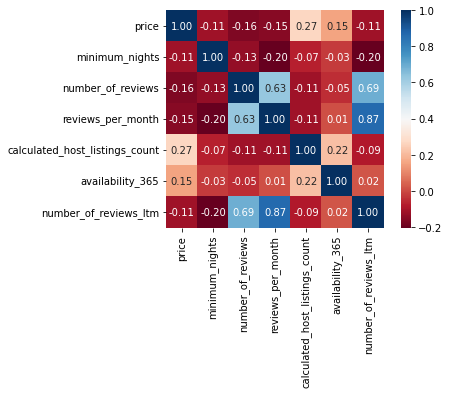

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Para sabermos o tipo de imóvel mais alugado, precisaremos contar a quantidade de ocorrências em cada tipo deles. Por isso, usaremos o método `value_counts() `na variável (coluna) `room_type`, que indica o tipo de locação oferecido.



In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2420
Private room        366
Hotel room            9
Shared room           8
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.863361
Private room       0.130574
Hotel room         0.003211
Shared room        0.002854
Name: room_type, dtype: float64

Percebemos acima que, com 86% das ocorrências, o tipo de imóvel mais alugado é a locação da casa ou apartamento todo.

### **Q8. Qual a localidade mais cara de Asheville?**

Para sabermos a localidade mais cara de Asheville, precisaremos agrupar os dados por bairro *(neighbourhoods)* e somar cada um de seus respectivos preços *(price)* de locação.

Isso significa que queremos verificar uma variável em função da outra. Fazemos isso usando `groupby()`.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
28801    180.632143
28804    164.404432
28732    156.618421
28803    147.431937
28805    147.041825
28704    142.541463
28715    140.174419
28806    131.948276
Name: price, dtype: float64

Podemos perceber acima que a localidade mais cara de Asheville é a de código postal 28801.

Tendo em vista o resultado, faz sentido o código postal 28801 ser o mais caro, já que este refere-se ao centro da cidade, que possui a limitação de locação citada anteriormente no contexto turístico.

**Como o *Dataset* fornece a latitude e longitude dos imóveis, podemos plotar cada ponto.** 

**Para isso, consideraremos `x=longitude` e `y=latitude`.**

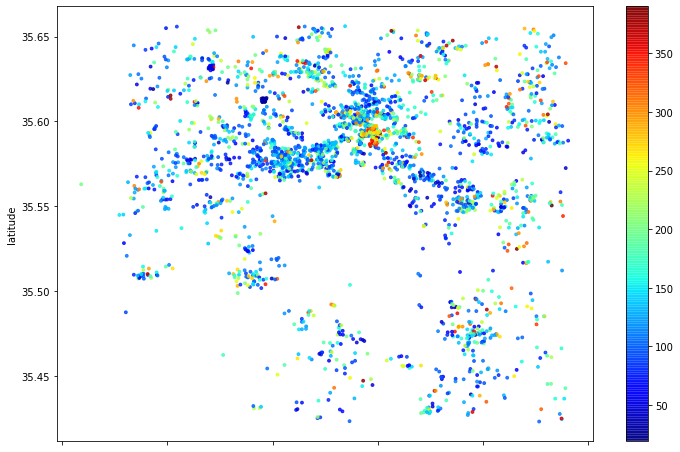

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.8, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Conseguimos perceber que a média de mínimo de noites para locação é de **5 noites**.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

5.473421334284695

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, mas já conseguimos notar a existência de *outliers*.

Além disso, conseguimos perceber que existem localidades com poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Concluímos também que é verdadeira a hipótese citada no contexto turístico, que nos levava a pensar que a tendência do preço de locação no centro da cidade aumentaria, devido à limitação de disponibilidade para locação no mesmo.

Vale lembrar também, que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Por isso, recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos que pode ser baixado na mesma página em que esse arquivo foi baixado.

Sua versão completa é o `listings.csv.gz`, que possui 3009 entradas e 75 variáveis.